Goal: combine RNASeq gene count data with information about top performing drugs and top drug targets to find insights about drug screening and gene expression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

gene_counts_df = pd.read_csv("harmonized_gene_counts.csv", low_memory = False)
drug_target_df = pd.read_csv("drug_target_associations_v_3_0_1.csv", low_memory = False)
unique_top_targets = list(set([line.replace("\n","") for line in open("genes_targeted_by_top_drugs.txt", "r")]))
## 25 unique targets

Identify top gene targets in gene expression data and label

In [2]:
top_genes_counts = []
is_top_target = []
for i in range(0,len(gene_counts_df)):
    ## iterate over rows
    if gene_counts_df.Symbol[i] in unique_top_targets:
        top_genes_counts.append([gene_counts_df.Symbol[i],
                                 gene_counts_df.totalCounts[i],
                                 gene_counts_df.diagnosis[i]])
        is_top_target.append(1)
    else:
        is_top_target.append(0)
gene_counts_df["isTopTarget"] = is_top_target

Plot distribution of non-top target gene counts vs top target gene counts

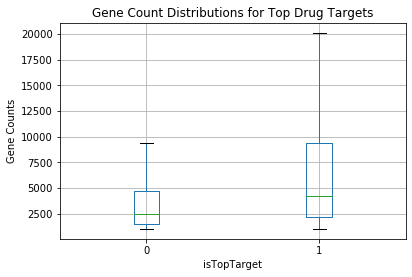

<Figure size 432x288 with 0 Axes>

In [3]:
gene_counts_df.boxplot(column="totalCounts",by="isTopTarget",showfliers=False)
plt.ylabel("Gene Counts")
plt.title("")
plt.suptitle("")
plt.title("Gene Count Distributions for Top Drug Targets")
plt.show()
plt.savefig("genecountsboxplotsgroupedbytoptargets.png")

Not surprisingly, top targets tend to have higher counts than non-top targets.

Now we visualize the gene counts grouped by diagnosis (NF1 vs NF2), for the overall dataset and only top targets:

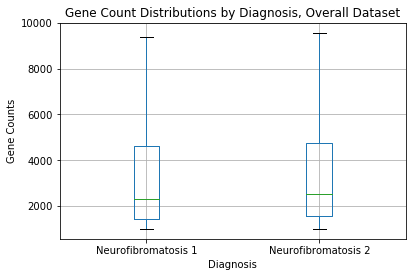

In [5]:
gene_counts_df.boxplot(column="totalCounts",by="diagnosis",showfliers=False)
plt.ylabel("Gene Counts")
plt.xlabel("Diagnosis")
plt.title("")
plt.suptitle("")
plt.title("Gene Count Distributions by Diagnosis, Overall Dataset")
plt.show()

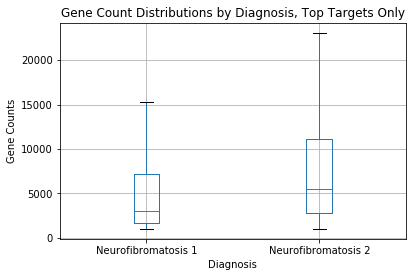

In [6]:
gene_counts_df[gene_counts_df.isTopTarget == 1].boxplot(column="totalCounts",by="diagnosis",showfliers=False)
plt.ylabel("Gene Counts")
plt.xlabel("Diagnosis")
plt.title("")
plt.suptitle("")
plt.title("Gene Count Distributions by Diagnosis, Top Targets Only")
plt.show()

Interestingly, while gene counts between NF1 and NF2 are similarly distributed for the overall data, within the top drug targets, NF2 samples tend to have higher gene counts than NF1 samples

Now we can visualize the distribution of z scores for top and non-top drug targets:

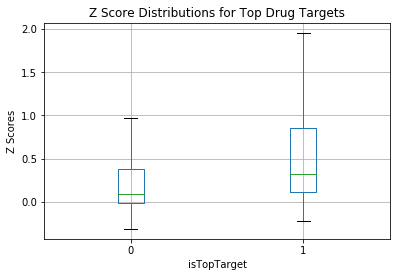

<Figure size 432x288 with 0 Axes>

In [7]:
gene_counts_df.boxplot(column="zScore",by="isTopTarget",showfliers=False)
plt.ylabel("Z Scores")
plt.suptitle("")
plt.title("Z Score Distributions for Top Drug Targets")
plt.show()
plt.savefig("zscoreboxplotsgroupedbytoptargets.png")

Again, probably not surprisingly, the top drug targets tend to have higher z-scores